In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing , reading the csv file (pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

In [2]:
%matplotlib inline
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns',100)          # Set now of columns visible to 100

In [3]:
print("Current Working Directory - "+os.getcwd()) # Current Working Directory

Current Working Directory - /Users/abhi011097/Dataset_Analysis/1_Credit_Card_Analysis


In [4]:
df=pd.read_csv("/Users/abhi011097/Dataset_Analysis/1_Credit_Card_Analysis/Dataset/Credit_card_transactions.csv")

In [5]:
print(df.columns)

Index(['index', 'City', 'Date', 'Card Type', 'Exp Type', 'Gender', 'Amount'], dtype='object')


In [6]:
#
# index is the sequencing - we ccan drop this column 
# City - Transation City 
# Card Type -  
# Exp Type - 
# Gender -
# Amount -

In [7]:
# Target Variables

# Task 1 

    # Comment on numerical summary for Quantitative variable as well as Categorical variables.

    # Comment on count distribution of 3 categories ( Card Type , Exp Type ,  Gender )
        # Questions to be answered
            # Which card type is highly and least used ?
            # In which expense category customer does most and least number of transactions  happens
            # Who does the most no of transactions (Males or Females)

    # Maximimum and minimum contribution to amount for ( Card Type , Exp Type ,  Gender )
        # Questions to be answered
            # Which card type has the highest & least contribution to total amount 
            # Which Exp Type has the highest & least contribution to total amount 
            # Which Gender Type has the highest & least contribution to total amount

    # 5 point summary wrt amount for each subcategories of ( Card Type , Exp Type , Gender )
        # Questions to be answered    
            # Comment on Median and Mean of Gender Type 
            # Comment on Median and Mean of Card Type 
            # Comment on Median and Mean of Exp Type 
            
            # Does any of the sub category among category Gender Type has skewness 
            # Does any of the sub category among category Card Type has skewness  
            # Does any of the sub category among category Exp Type has skewness
            
    
    # Comment on count distribution of Gender among (Exp Type , Card Type )
        # Questions to be answered
            # Any subcategory in Exp type where no of transactions dominates for men
            # Any subcategory in Card type where no of transactions dominates for men

### Check and Clean Dataframe

In [8]:
# Check First five 
df.head() # data.head(10)
#df.tail()

,index,City,Date,Card Type,Exp Type,Gender,Amount
0,0,"Delhi, India",29-Oct-14,Gold,Bills,F,82475
1,1,"Greater Mumbai, India",22-Aug-14,Platinum,Bills,F,32555
2,2,"Bengaluru, India",27-Aug-14,Silver,Bills,F,101738
3,3,"Greater Mumbai, India",12-Apr-14,Signature,Bills,F,123424
4,4,"Bengaluru, India",5-May-15,Gold,Bills,F,171574


In [9]:
df.info()  # As the count of non null equals to rangeindex , we can conclude no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26052 entries, 0 to 26051
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      26052 non-null  int64 
 1   City       26052 non-null  object
 2   Date       26052 non-null  object
 3   Card Type  26052 non-null  object
 4   Exp Type   26052 non-null  object
 5   Gender     26052 non-null  object
 6   Amount     26052 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 1.4+ MB


In [10]:
df.drop(columns='index',inplace=True) # Removing the irrelevent Column

# Task 1

### Comment on numerical summary for Quantitative variable as well as Categorical variables

In [11]:
df.describe(include='O') # To describe stats for categorical column

,City,Date,Card Type,Exp Type,Gender
count,26052,26052,26052,26052,26052
unique,986,600,4,6,2
top,"Bengaluru, India",20-Sep-14,Silver,Food,F
freq,3552,65,6840,5463,13680


In [12]:
### City           Bengaluru has the highest now of transactions. 
### Date           20-Sept-2014 have highest no of transactions recorded.
### Card Type      Silver is the most freuent card type. 
### Exp Type       Most No of transactions are present for food category related.
### Gender         Females contribute to most of the transactions

In [13]:
df.describe() # To describe stats for quantitative column

,Amount
count,26052.000000
mean,156411.537425
std,103063.254287
min,1005.000000
25%,77120.250000
50%,153106.500000
75%,228050.000000
max,998077.000000


In [14]:
### Just looking at mean and median for amount we can see there is a slight deviation between mean and median
### Mean is on higher side so there will be transactions on higher end 
### Graph is expected to be deviated towards right (Right Skewness (+)).

### Comment on count distribution of 3 categories ( Card Type , Exp Type ,  Gender )

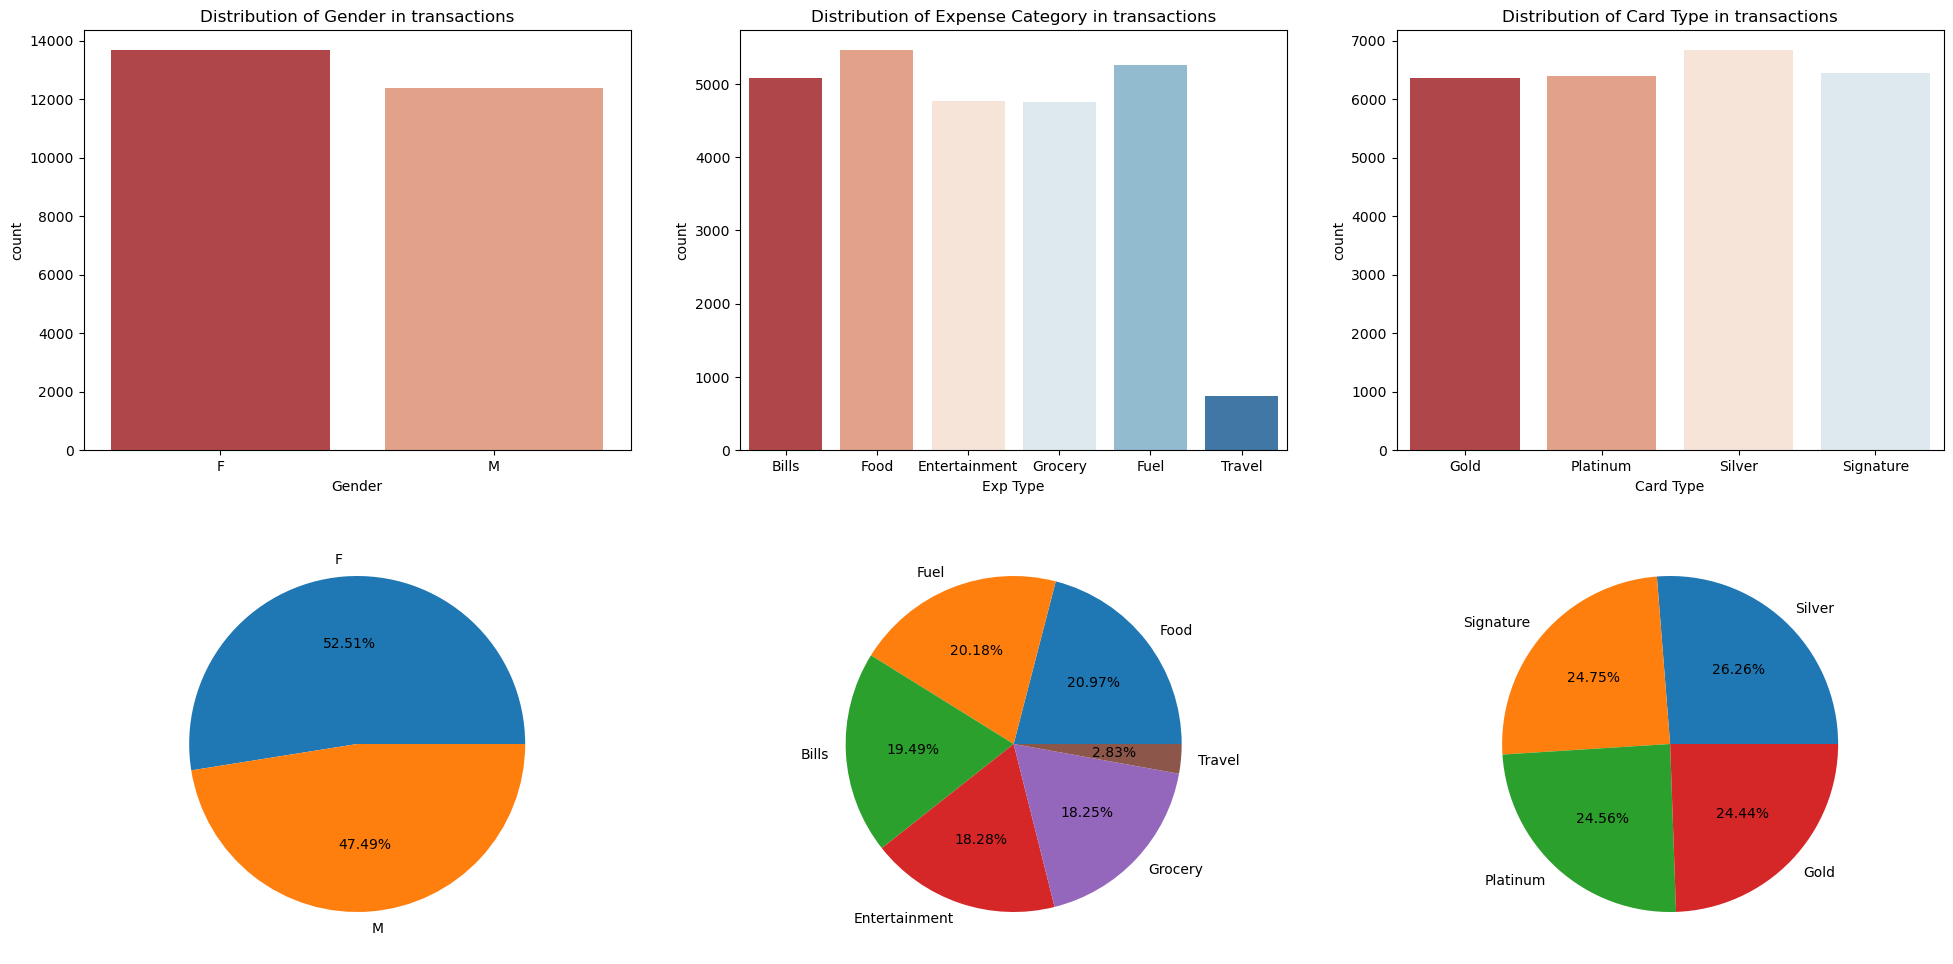

In [15]:
# For Individual 
# Gender distribution
# plt.figure(figsize=(4,3)) # (width,height)
# sns.countplot(x=df["Gender"])
# plt.title("Distribution of Gender in transactions")
# plt.show()


# For Multiple

plt.subplots(2,3,figsize=(24,12))

plt.subplot(2,3,1)
sns.countplot(x=df["Gender"],palette=sns.color_palette("RdBu"))
plt.title("Distribution of Gender in transactions")

plt.subplot(2,3,2)
sns.countplot(x=df["Exp Type"],palette=sns.color_palette("RdBu"))
plt.title("Distribution of Expense Category in transactions")

plt.subplot(2,3,3)
sns.countplot(x=df["Card Type"],palette=sns.color_palette("RdBu"))
plt.title("Distribution of Card Type in transactions")

plt.subplot(2,3,4)
plt.pie(x=df["Gender"].value_counts(),labels=df["Gender"].value_counts().index,autopct="%0.2f%%")

plt.subplot(2,3,5)
plt.pie(x=df["Exp Type"].value_counts(),labels=df["Exp Type"].value_counts().index,autopct="%0.2f%%")

plt.subplot(2,3,6)
plt.pie(x=df["Card Type"].value_counts(),labels=df["Card Type"].value_counts().index,autopct="%0.2f%%")
plt.show()

In [16]:
# Graph - Distribution of Gender in transactions
    # It tells the no of transactions done by female is 5 % more then the male


# Graph - Distribution of Expense Category in transactions
    # We have 6 different categories
    # Food has the highest 20.97%
    # We can see most of Exp type categories (5 out of 6) has transaction share between 18.25 to 20.97 
    # We have (travel) 1 out of 6 category which has the least share with 2.83 %
    
    
# Graph - Distribution of Card Type in transactions
    # We have 4 different card type categories
    # All 4 transaction share lie between 24.44 % to 26.26 %
    # Silver is the most used card type

#### Answers 

In [17]:
# Which card type is highly and least used ?
    # Silver is the highest used card & Gold is the least
    
# In which expense category customer does most and least number of transactions  happens ?
    # Food has the highest no of transactions 
    # Travel has the lowest no of transactions

# Who does the most no of transactions (Males or Females)
    # Females has the most no of transactions 
    

### Maximimum and minimum contribution to amount for ( Card Type , Exp Type ,  Gender )

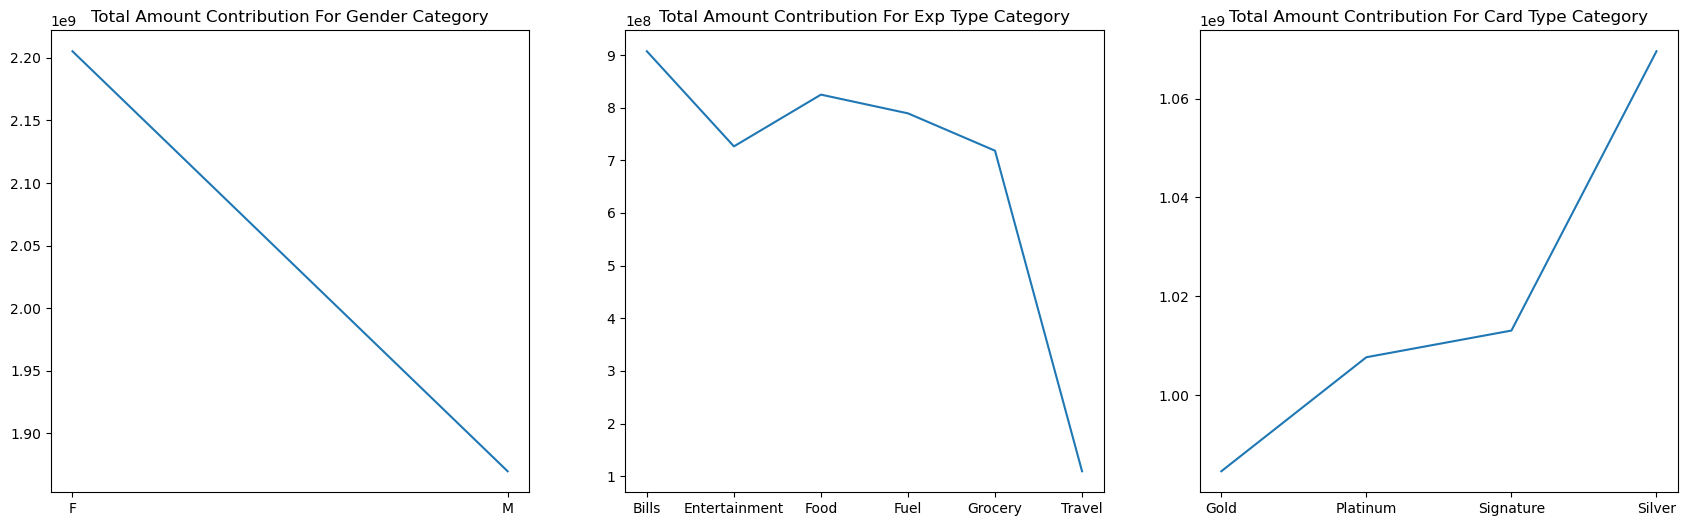

In [60]:
plt.subplots(1,3,figsize=(21,6))
plt.subplot(1,3,1)
plt.plot(df.groupby('Gender').sum())
plt.title("Total Amount Contribution For Gender Category")

plt.subplot(1,3,2)
plt.plot(df.groupby('Exp Type').sum())
plt.title("Total Amount Contribution For Exp Type Category")

plt.subplot(1,3,3)
plt.plot(df.groupby('Card Type').sum())
plt.title("Total Amount Contribution For Card Type Category")


plt.show()

In [18]:
#Answers

# Which card type has the highest & least contribution to total amount 
        # Silver has the highest overall amount while gold is least 
    
# Which Exp Type has the highest & least contribution to total amount 
        # Bills has the highest overall amount while travel is least
    
# Which Gender Type has the highest & least contribution to total amount
        # Female has the highest overall amount then men
           

### 5 point summary wrt amount for each subcategories of ( Card Type , Exp Type ,  Gender )

In [85]:
df.groupby('Gender').describe()

Amount                                                            \
          count           mean            std     min       25%       50%   
Gender                                                                      
F       13680.0  161206.946637  115965.163236  1005.0  77128.50  154797.0   
M       12372.0  151109.145086   86282.544283  1018.0  77102.25  151242.0   

                             
              75%       max  
Gender                       
F       230407.75  998077.0  
M       225900.00  299981.0

In [86]:
df.groupby('Card Type').describe()

Amount                                                            \
            count           mean            std     min       25%       50%   
Card Type                                                                     
Gold       6367.0  154631.621800  105800.484508  1038.0  74389.50  150431.0   
Platinum   6398.0  157492.813223  102051.710950  1005.0  79394.75  154215.0   
Signature  6447.0  157133.721886  104385.788773  1024.0  76500.00  153972.0   
Silver     6840.0  156376.273830  100127.272753  1018.0  78180.00  154028.5   

                                
                 75%       max  
Card Type                       
Gold       224538.50  996754.0  
Platinum   227670.25  998077.0  
Signature  230244.50  994537.0  
Silver     230039.75  955468.0

In [87]:
df.groupby('Exp Type').describe()

Amount                                                  \
                count           mean            std     min       25%   
Exp Type                                                                
Bills          5078.0  178627.899370  151893.760199  1026.0  78831.75   
Entertainment  4762.0  152548.831583   86628.587025  1061.0  77749.25   
Food           5463.0  150965.405272   86492.589170  1018.0  75862.50   
Fuel           5257.0  150111.436371   85929.342308  1038.0  77405.00   
Grocery        4754.0  151074.447413   86440.356185  1005.0  75648.25   
Travel          738.0  148042.833333   86627.487531  1070.0  73909.00   

                                              
                    50%        75%       max  
Exp Type                                      
Bills          160551.0  237895.50  998077.0  
Entertainment  153994.5  228414.75  299936.0  
Food           151679.0  225387.50  299837.0  
Fuel           149629.0  224409.00  299905.0  
Grocery        152157.5  225550.50  299920.0  
Travel         146947.0  221778.75  299618.0

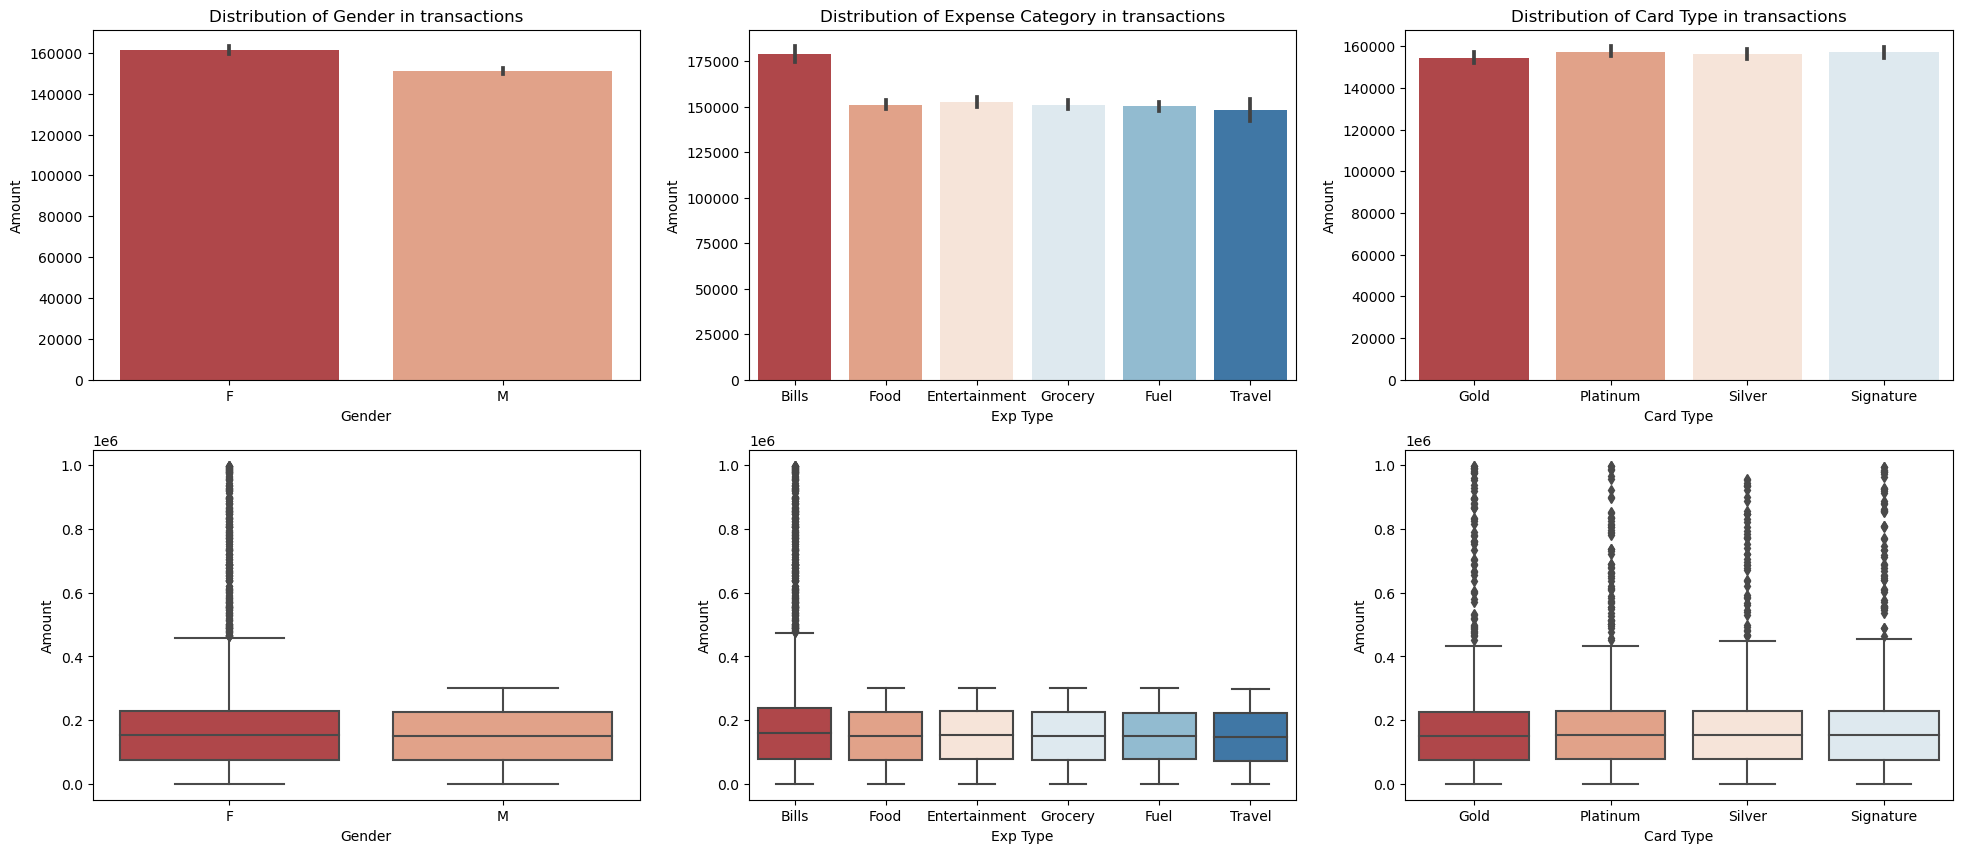

In [19]:
plt.subplots(2,3,figsize=(24,10))

plt.subplot(2,3,1)
sns.barplot(x=df["Gender"],y=df["Amount"],palette=sns.color_palette("RdBu"))
plt.title("Distribution of Gender in transactions")

plt.subplot(2,3,2)
sns.barplot(x=df["Exp Type"],y=df["Amount"],palette=sns.color_palette("RdBu"))
plt.title("Distribution of Expense Category in transactions")

plt.subplot(2,3,3)
sns.barplot(x=df["Card Type"],y=df["Amount"],palette=sns.color_palette("RdBu"))
plt.title("Distribution of Card Type in transactions")


plt.subplot(2,3,4)
sns.boxplot(data=df,x='Gender' ,y='Amount',palette=sns.color_palette("RdBu"))

plt.subplot(2,3,5)
sns.boxplot(data=df,x='Exp Type' ,y='Amount',palette=sns.color_palette("RdBu"))

plt.subplot(2,3,6)
sns.boxplot(data=df,x='Card Type' ,y='Amount',palette=sns.color_palette("RdBu"))

plt.show()



In [75]:
#df.groupby('Gender').describe()
print("\n******** Skewness for Exp Type ********\n")
print(df.groupby('Gender').skew())
print("\n******** Skewness for Exp Type ********\n")
print(df.groupby('Exp Type').skew())
print("\n******** Skewness for Exp Type ********\n")
print(df.groupby('Card Type').skew())


******** Skewness for Exp Type ********

          Amount
Gender          
F       2.298093
M      -0.018652

******** Skewness for Exp Type ********

                 Amount
Exp Type               
Bills          2.525439
Entertainment -0.029375
Food          -0.021597
Fuel           0.007120
Grocery       -0.023394
Travel         0.027052

******** Skewness for Exp Type ********

             Amount
Card Type          
Gold       2.068331
Platinum   1.679931
Signature  1.822768
Silver     1.413590


In [ ]:
# Comment on Median and Mean of Gender Type ?
    # Median is almost close.
    # Mean for female seems to be high which is influenced by presence of transactions having high amount value.

# Comment on Median and Mean of Card Type 
   # Median is almost close for all subcategories in Card Type
   # Mean for Bills seems to be high which is influenced by presence of transactions having high amount value.
    
# Comment on Median and Mean of Exp Type 
   # Median is almost close for all subcategories in Card Type
   # Mean is almost close for all subcategories in Card Type 

# Does any of the sub category among category Gender Type has skewness 
   # Looking at the box plot as well as skewness value we can say female transactions are highly skewed

# Does any of the sub category among category Card Type has skewness  
  # Looking at the box plot as well as skewness value we can say Bill Category for transactions are highly skewed

# Does any of the sub category among category Exp Type has skewness
  # All sub category has skewness 

### Comment on count distribution of Gender among (Exp Type ,  Card Type )

In [96]:
df.groupby(["Exp Type","Gender"]).size()

Exp Type       Gender
Bills          F         2860
               M         2218
Entertainment  F         2384
               M         2378
Food           F         3012
               M         2451
Fuel           F         2617
               M         2640
Grocery        F         2428
               M         2326
Travel         F          379
               M          359
dtype: int64

In [97]:
df.groupby(["Card Type","Gender"]).size()

Card Type  Gender
Gold       F         3287
           M         3080
Platinum   F         3252
           M         3146
Signature  F         3368
           M         3079
Silver     F         3773
           M         3067
dtype: int64

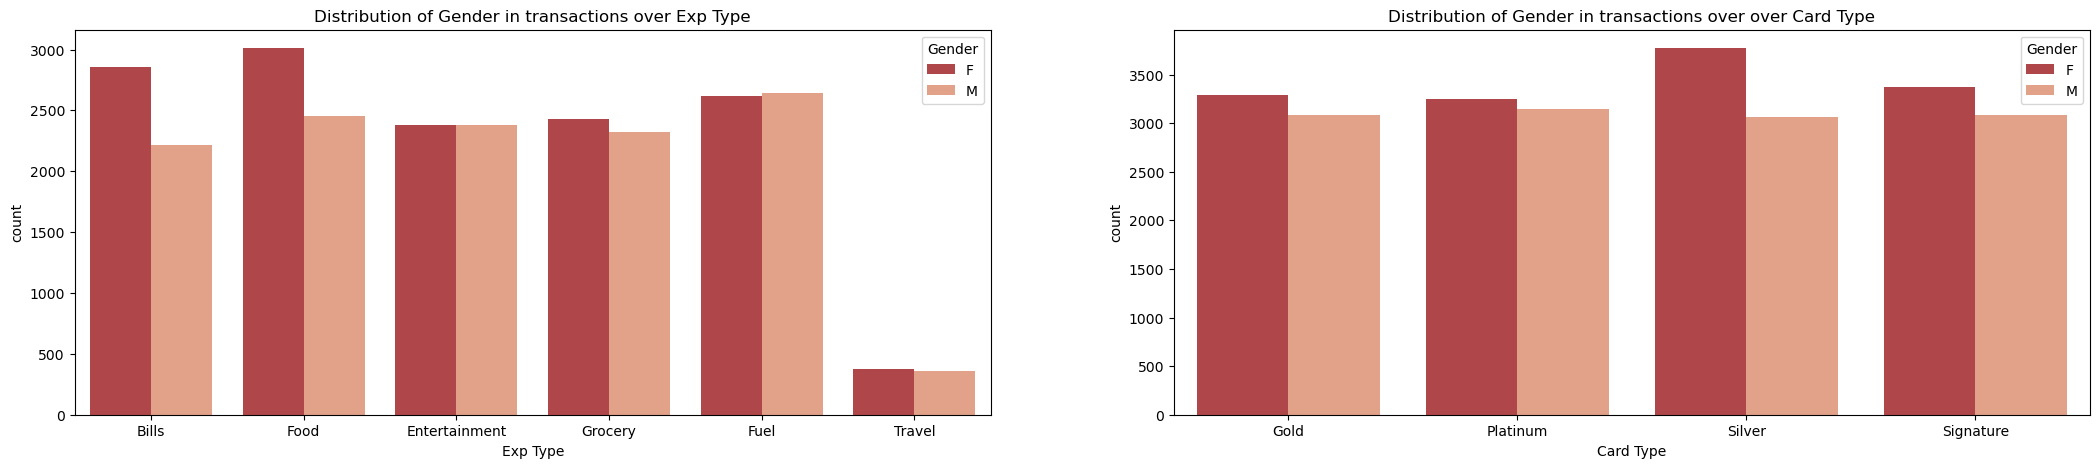

In [20]:
plt.subplots(1,2,figsize=(26,5))
plt.subplot(1,2,1)
sns.countplot(x=df["Exp Type"],hue=df["Gender"],palette=sns.color_palette("RdBu"))
plt.title("Distribution of Gender in transactions over Exp Type")

plt.subplot(1,2,2)
sns.countplot(x=df["Card Type"],hue=df["Gender"],palette=sns.color_palette("RdBu"))
plt.title("Distribution of Gender in transactions over over Card Type")
plt.show()

In [22]:
#Answers
            # Any subcategory in Exp type where no of transactions dominates for men
                # Only in Fuel subcategory  
            # Any subcategory in Card type where no of transactions dominates for men
                # No , All subcategories dominated by womens